<a href="https://colab.research.google.com/github/ioritz2002/PracticasIA/blob/main/Pruebas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model

**CARGAR DATOS**

**Cargar con CSV**

In [ ]:
#Leer el csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Salary_Data.csv")
#Quitamos los valores nulos
df = df.dropna()

**Cargar con JSON**

In [ ]:
df = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Salary_Data.json")
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')
df = df.dropna(subset=['Salary'])

**LEER DATOS**

In [ ]:

#Leer las variables independientes, en este caso los años de experiencia y la edad
X = np.array(df[['Years of Experience', 'Age']])
#Leer las variables dependientes, en este caso el salario
y = np.array(df['Salary'])

**REGRESION LINEAL SIMPLE**

Pendiente (m):  7046.282228619126
Punto de corte en el eje y:  58294.04717119178
Tasa de ajuste promedio (r): 0.809061079858987
Coeficiente de determinacion: 0.6545798309425902


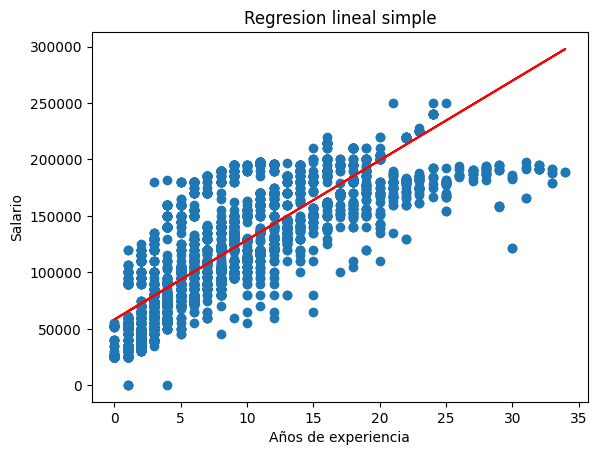

In [ ]:
#Como va a ser una regresion lineal simple primero cogemos solo una de las variables independientes y la guardamos en una variable de python llamado x, en este caso los datos de años de experiencia.
x = np.array(df['Years of Experience']).astype(int)

#Obtenemos los valores de la pendiente y el punto de corte en el eje y, para ello calculamos la regresion lineal. La ecuacion es y = b+mx
slope, intercept, r, p, std_err = stats.linregress(x,y)

print("Pendiente (m): ", str(slope))
print("Punto de corte en el eje y: ", str(intercept))
print("Tasa de ajuste promedio (r): " + str(r))
print("Coeficiente de determinacion: " + str(r**2))

#funcion de la recta de la regresion lineal
def myfunc(x):
    return slope * x + intercept

#Recorre cada vaor del array x para obtener un nuevo arrray con los valores para el eje y.
model = list(map(myfunc, x))

#En el subplot el primer numero indica las filas, el segundo numero indica las columnas y el tercer numero indica en que numero se va a colocar
#plt.subplot(2,2,1)

plt.scatter(x, y)
plt.plot(x, model, color='red')
plt.title("Regresion lineal simple")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()

**REGRESION POLINOMIAL**

        2
-302.9 x + 1.375e+04 x + 3.501e+04


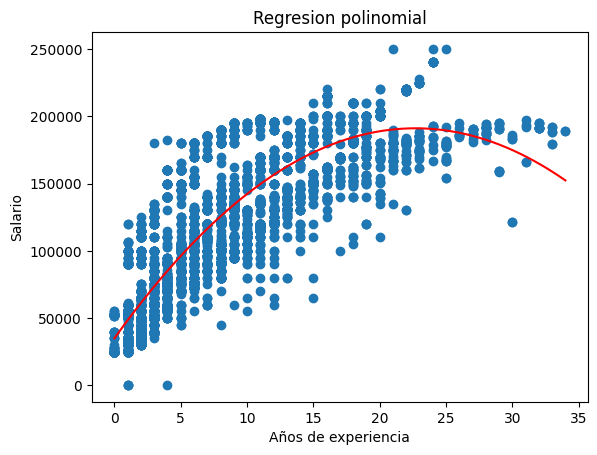

In [ ]:
#Los parametros para polyfit son los siguientes, x, y y el grado que tendra el polinomio.
model = np.poly1d(np.polyfit(x,y,2))
print(model)

line = np.linspace(x.min(), x.max(), num=1000)

plt.scatter(x, y)
plt.plot(line, model(line), color="red")
plt.title("Regresion polinomial")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()

**REGRESION LINEAL MULTIPLE**

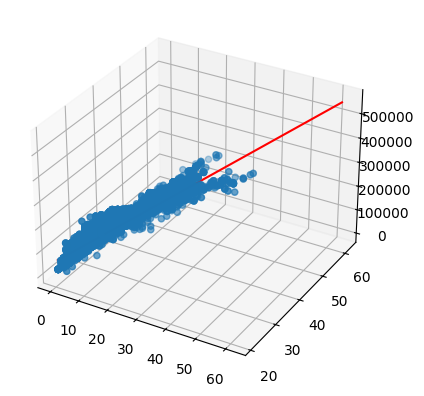

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

x_exp = np.linspace(df['Years of Experience'].min(), df['Age'].max(), 100)
x_age = np.linspace(df['Age'].min(), df['Age'].max(), 100)

re_exp = x_exp.reshape(-1,1)
re_age = x_age.reshape(-1,1)

arr = np.concatenate((re_exp, re_age), axis=1)
pred = regr.predict(arr)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['Years of Experience'], df['Age'],y)
ax.plot(x_exp, x_age, pred, color="red")
plt.show()